In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier

import joblib

In [2]:
box_model = pd.read_csv('./data_frames/bruins_isles_live_scrape_preds.csv')
minutes_model = pd.read_csv('./data_frames/bruins_isles_live_scrape_minutes_preds.csv')
minutes_model_art_1 = pd.read_csv('./data_frames/penguins_isles_artifical_live_scrape_minutes.csv')
minutes_model_art_2 = pd.read_csv('./data_frames/lighting_canes_artifical_scrape_minutes.csv')

In [3]:
box_differences = joblib.load('./models/random_forest_classifier.pkl')

In [4]:
diff_preds = box_differences.predict_proba(box_model.drop(columns=['period','period_time','rfc_prediction']))
diff_preds =[x[1] for x in diff_preds]
box_model['win_percentage'] = diff_preds

In [5]:
def make_line_plot(df, prediction_column, target_column, scale = 1, prediction_color = 'red'):
    plt.figure(figsize=(10,8))
    plt.plot(df['period_time'], (df[prediction_column]-.5), color=prediction_color, label = 'Percent chance to win above 50%')
    plt.plot(df['period_time'], (df[target_column]/scale), label= f'{target_column} differental (scaled down x{scale})')
    plt.xlim(0,6000)
    plt.title(f'Live Game Prediction vs {target_column} Differential', size = 20)
    plt.ylabel('Relative Values', size = 15)
    plt.xlabel('Time Into Game (minutes)', size = 15)
    plt.legend();


Predictions of the differences in box scores model, and how they compare to certain tracked stats. 

In [6]:
box_model.head()

,shots,blocked_shots,penalty_minutes,power_play_percentage,power_play_goals,power_play_chances,faceoff_percent,takeaways,giveaways,hits,ice_tilt,period,period_time,rfc_prediction,win_percentage
0,0,0,0,0.0,0.0,0.0,100.0,0,0,0,-69.0,1,8,yes,0.504487
1,0,0,0,0.0,0.0,0.0,100.0,0,0,0,-152.0,1,126,yes,0.504487
2,0,1,0,0.0,0.0,0.0,100.0,1,0,-1,-154.0,1,211,yes,0.508222
3,2,0,0,0.0,0.0,0.0,100.0,1,0,-2,-274.0,1,259,yes,0.529556
4,2,0,0,0.0,0.0,0.0,0.0,1,0,-2,-385.0,1,259,no,0.483156


In [7]:
model_train_df = pd.read_csv('./data_frames/game_stats_differences_2020.csv')
X = model_train_df.drop(columns=['won', 'goal_diff','goals','game_ids', ])
y = model_train_df['won']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [8]:
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X,y)
print(f'dummy score: {dc.score(X,y)}')
null_preds = dc.predict(X)

dummy score: 0.5023041474654378


In [9]:
box_differences.score(X_test,y_test), box_differences.score(X_train,y_train)

(0.7142857142857143, 0.7035330261136713)

In [10]:
rfc_preds = box_differences.predict(X_test)

<Figure size 720x720 with 0 Axes>

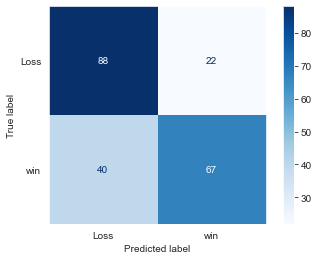

In [46]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
plot_confusion_matrix(box_differences, X_test, y_test, cmap='Blues',display_labels=['Loss', 'win']);    

We can see that the model is performing reasonably well considering sports data. The model doest use the score of the game to try and determine the winner, and is still correct 70% of the time! It does not struggle with overfitting thankfully, so it seems like it could be a strong model to check for overall game success rate. The model does significantly outperform the baseline model, so it does seem to have merrit as something to be used for predicting the winner of a game. 

In [12]:
sns.set_style('darkgrid')

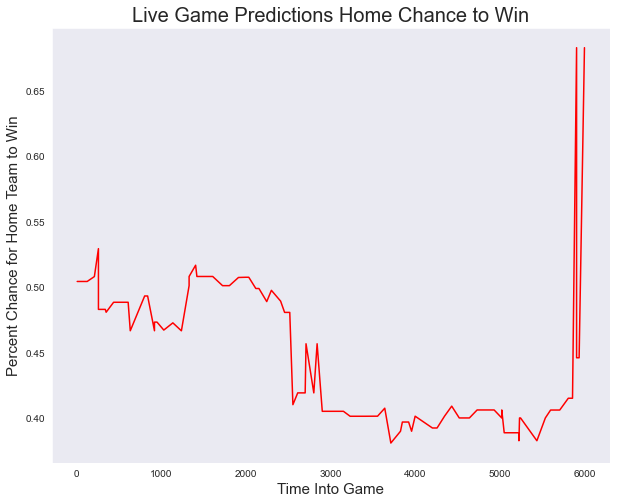

In [47]:
plt.figure(figsize=(10,8))
plt.plot(box_model['period_time'], (box_model['win_percentage']), color='red', label = 'Percent chance to win')
plt.title('Live Game Predictions Home Chance to Win', size = 20)
plt.xlabel('Time Into Game', size = 15)
plt.ylabel('Percent Chance for Home Team to Win', size = 15);

Knowing that the Tampa Bay Lighting lost this game, despite a late fluery to attempt to win, this chance to win graph makes a lot of sense. The game was mostly dominated by the road team, the New York Islanders, and the chance to win reflects that. 

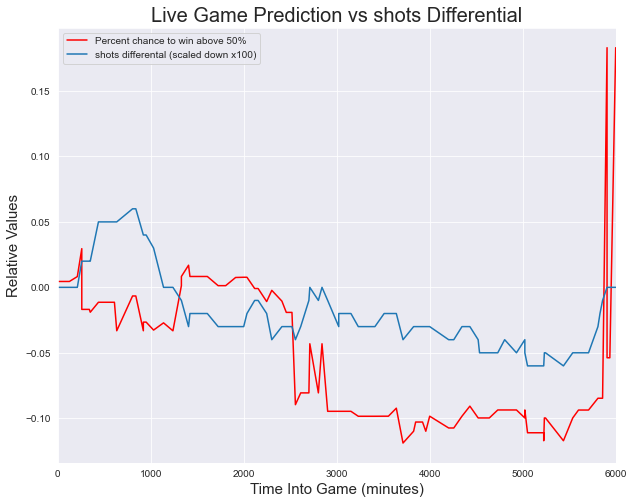

In [14]:
make_line_plot(box_model,'win_percentage','shots', 100)

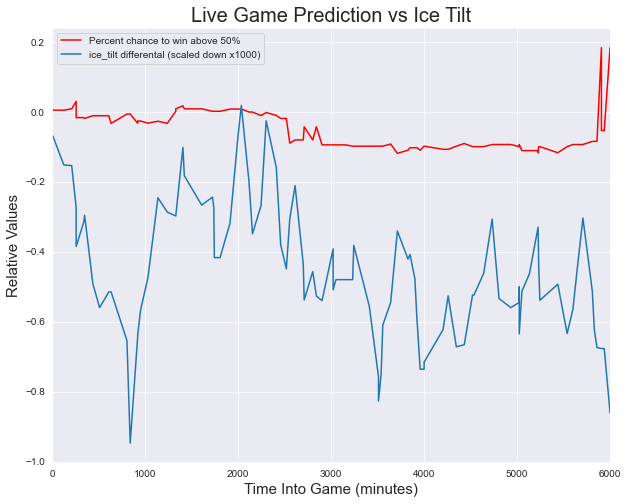

In [15]:
make_line_plot(box_model,'win_percentage','ice_tilt', 1000)
plt.title('Live Game Prediction vs Ice Tilt', size =20);

In two graphs above, you can see the effect some of the features have on the chance to win. Shots does seem to have a more direct correlation with the chance to win prediction, but there is also some correlation with ice tilt.

Now working with the minute over minute modeling

In [35]:
random_forest = pd.read_csv('./data_frames/minute_rf_scores.csv')
log_reg = pd.read_csv('./data_frames/minute_log_reg_scores.csv')

In [36]:
log_reg

,test_score,train_score,minutes_into_game
0,0.520737,0.540707,200
1,0.585253,0.565284,400
2,0.516129,0.582181,600
3,0.562212,0.586790,800
4,0.576037,0.615975,1000
5,0.589862,0.652842,1200
6,0.594470,0.649770,1400
7,0.589862,0.652842,1600
8,0.589862,0.668203,1800
9,0.617512,0.697389,2000


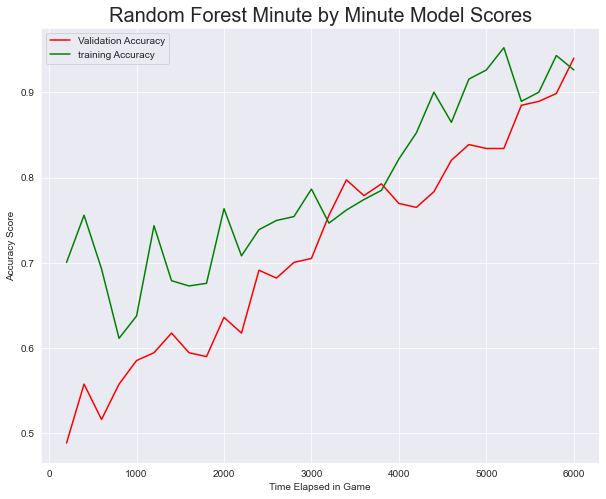

In [41]:
plt.figure(figsize=(10,8))
plt.plot(random_forest['minutes_into_game'], random_forest['test_score'], color = 'red', label = 'Validation Accuracy')  
plt.plot(random_forest['minutes_into_game'], random_forest['train_score'],color = 'green', label = 'training Accuracy')
plt.title('Random Forest Minute by Minute Model Scores', size = 20)
plt.xlabel('Time Elapsed in Game')
plt.ylabel('Accuracy Score')
plt.legend()

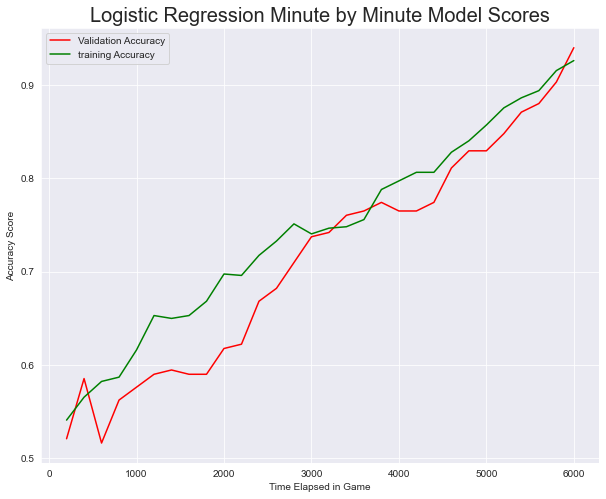

In [43]:
plt.figure(figsize=(10,8))
plt.plot(log_reg['minutes_into_game'], log_reg['test_score'], color = 'red', label = 'Validation Accuracy')  
plt.plot(log_reg['minutes_into_game'], log_reg['train_score'],color = 'green', label = 'training Accuracy')
plt.title('Logistic Regression Minute by Minute Model Scores', size = 20)
plt.xlabel('Time Elapsed in Game')
plt.ylabel('Accuracy Score')
plt.legend()

Live Scrapped Game

In [16]:
minutes_model.tail()

,Goal,Shot,Blocked Shot,Faceoff,Takeaway,Giveaway,Hit,Missed Shot,Penalty,period_time,predictions,probability_win
91,-2,0,-4,-10,2,6,-1,3,1,5831,no,0.000000
92,-2,1,-5,-10,2,6,-1,3,1,5859,no,0.000000
93,-1,1,-5,-10,2,6,-1,3,1,5907,no,0.000000
94,-1,1,-5,-11,2,6,-1,3,1,5937,no,0.045455
95,-1,1,-5,-10,2,6,-1,5,1,6000,no,0.000000


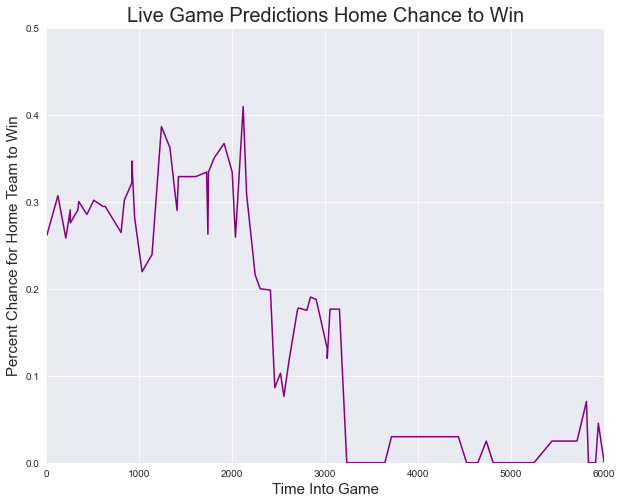

In [33]:
plt.figure(figsize=(10,8))
plt.plot(minutes_model['period_time'], (minutes_model['probability_win']), color='purple', label = 'Percent chance to win')
plt.title('Live Game Predictions Home Chance to Win', size = 20)
plt.xlabel('Time Into Game', size = 15)
plt.ylabel('Percent Chance for Home Team to Win', size = 15)
plt.xlim(0,6000)
plt.ylim(0,.5);

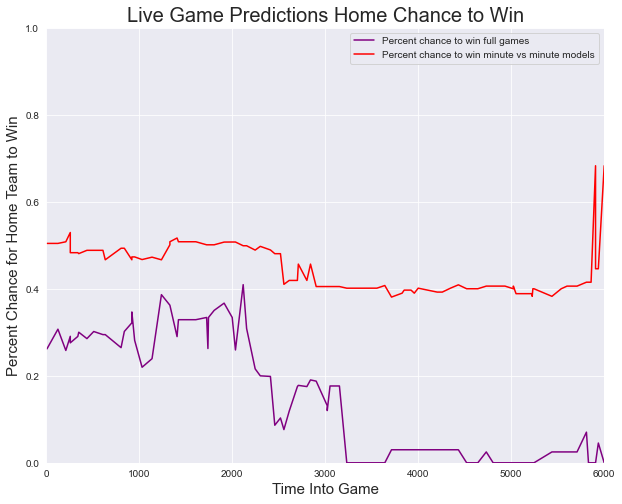

In [34]:
plt.figure(figsize=(10,8))
plt.plot(minutes_model['period_time'], (minutes_model['probability_win']), color='purple', label = 'Percent chance to win full games')
plt.plot(box_model['period_time'], (box_model['win_percentage']), color='red', label = 'Percent chance to win minute vs minute models')
plt.title('Live Game Predictions Home Chance to Win', size = 20)
plt.xlabel('Time Into Game', size = 15)
plt.ylabel('Percent Chance for Home Team to Win', size = 15)
plt.xlim(0,6000)
plt.ylim(0,1)
plt.legend();

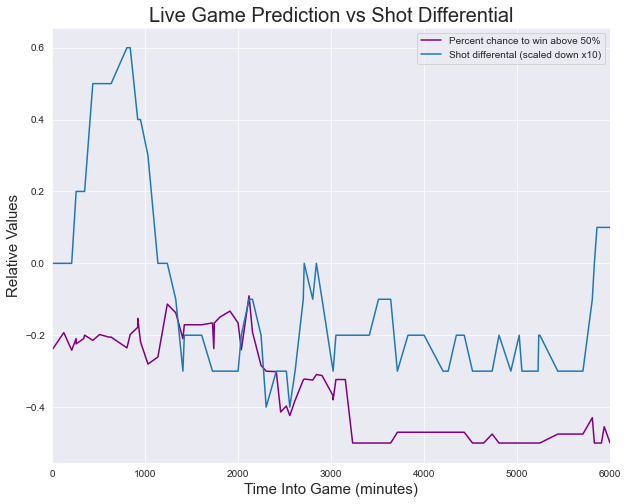

In [19]:
make_line_plot(minutes_model,'probability_win','Shot', 10, prediction_color='purple')

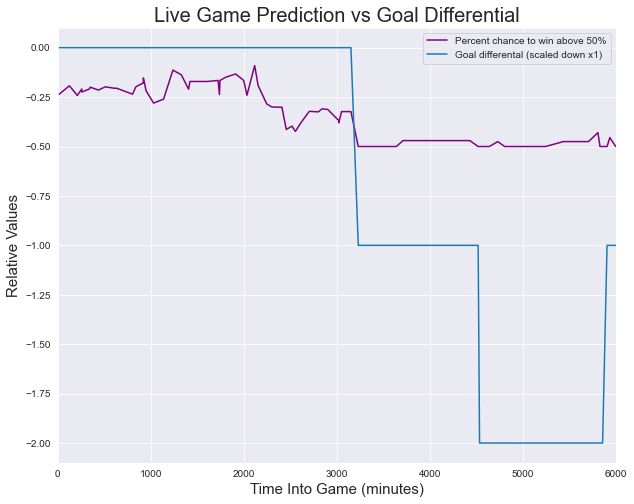

In [20]:
make_line_plot(minutes_model,'probability_win','Goal', prediction_color='purple')

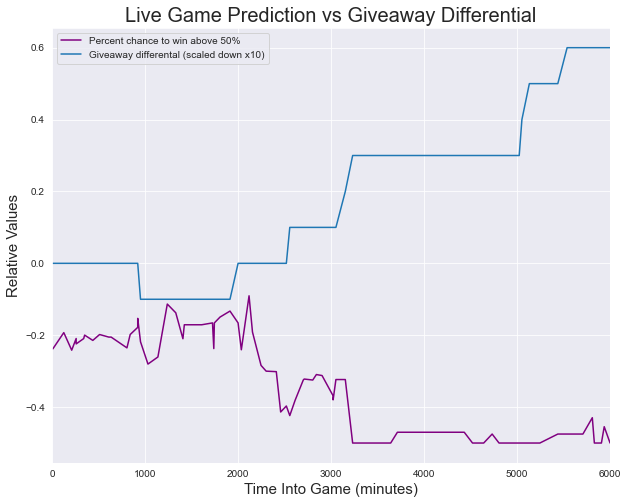

In [21]:
make_line_plot(minutes_model,'probability_win', 'Giveaway', 10, prediction_color='purple' )

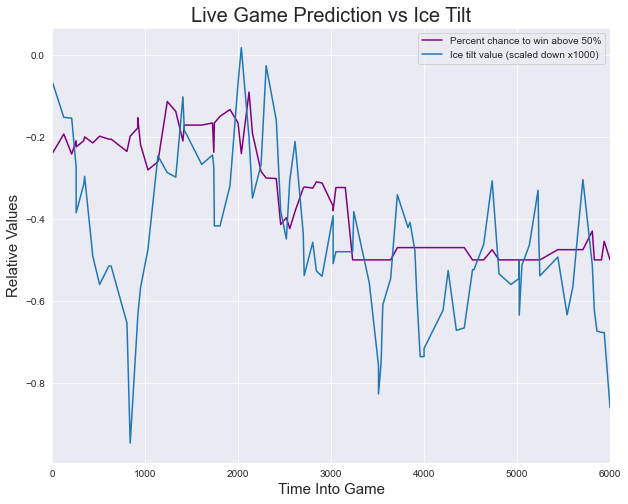

In [22]:
plt.figure(figsize=(10,8))
plt.plot(minutes_model['period_time'], (minutes_model['probability_win']-.5), color='purple', label = 'Percent chance to win above 50%')
plt.plot(box_model['period_time'], (box_model['ice_tilt']/1000), label= 'Ice tilt value (scaled down x1000)')
plt.xlim(0,6000)
plt.title('Live Game Prediction vs Ice Tilt', size = 20)
plt.ylabel('Relative Values', size = 15)
plt.xlabel('Time Into Game', size = 15)
plt.legend();

now for the artifical scrapes

In [23]:
period_times_artifical = [x for x in range(200,6001,200)]

In [24]:
minutes_model_art_1['period_time'] = period_times_artifical
minutes_model_art_2['period_time'] = period_times_artifical

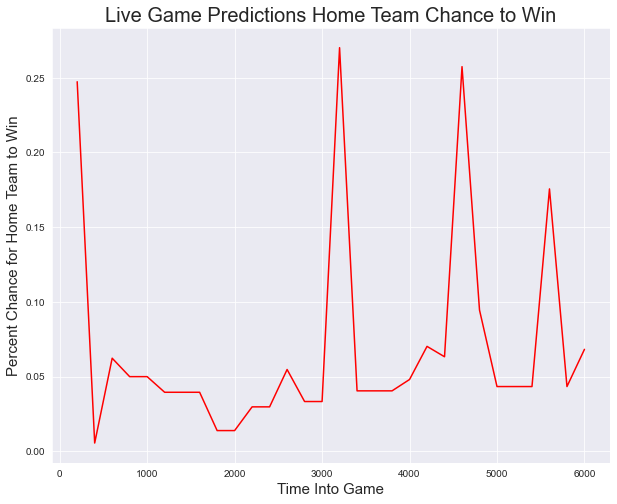

In [25]:
plt.figure(figsize=(10,8))
plt.plot(minutes_model_art_1['period_time'], (minutes_model_art_1['probability_win']), color='red', label = 'Percent chance to win')
plt.title('Live Game Predictions Home Team Chance to Win', size = 20)
plt.xlabel('Time Into Game', size = 15)
plt.ylabel('Percent Chance for Home Team to Win', size = 15);

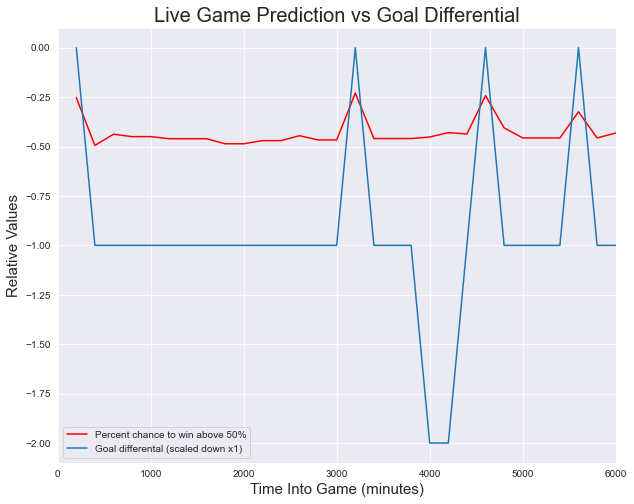

In [26]:
make_line_plot(minutes_model_art_1, 'probability_win', 'Goal')

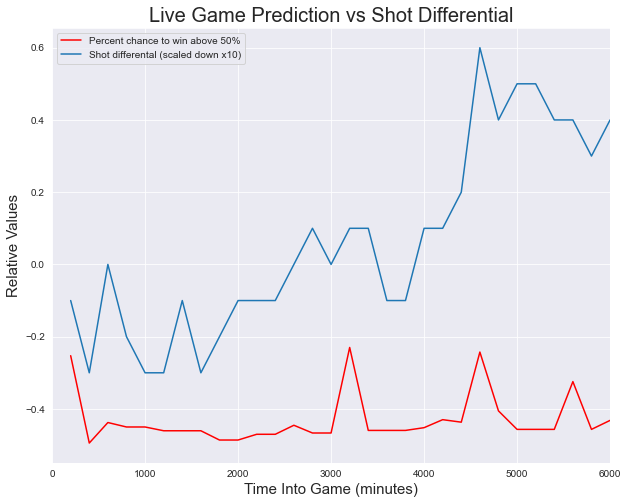

In [27]:
make_line_plot(minutes_model_art_1, 'probability_win', 'Shot', 10)

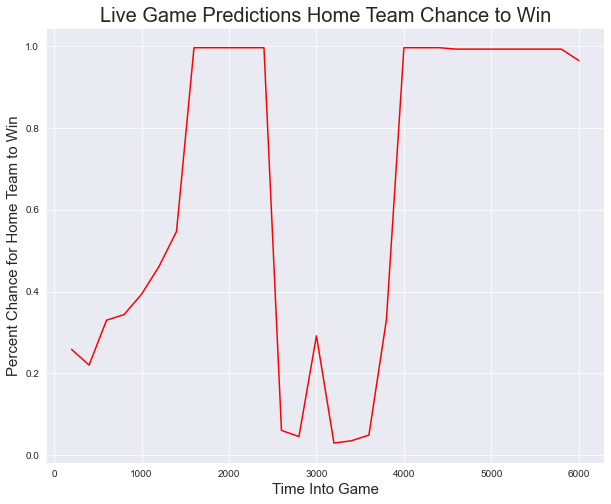

In [28]:
plt.figure(figsize=(10,8))
plt.plot(minutes_model_art_2['period_time'], (minutes_model_art_2['probability_win']), color='red', label = 'Percent chance to win')
plt.title('Live Game Predictions Home Team Chance to Win', size = 20)
plt.xlabel('Time Into Game', size = 15)
plt.ylabel('Percent Chance for Home Team to Win', size = 15);

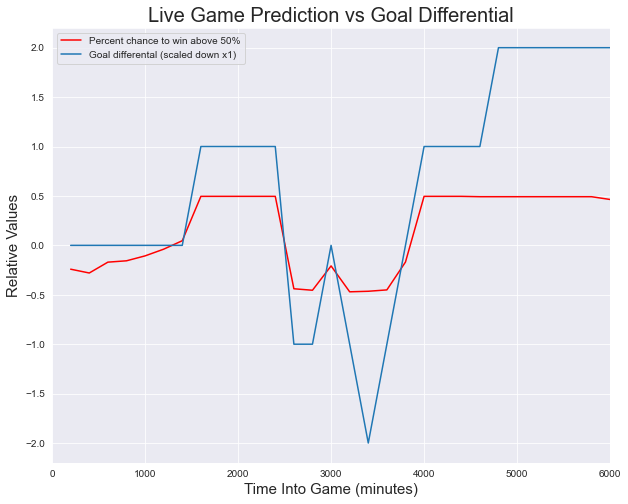

In [29]:
make_line_plot(minutes_model_art_2, 'probability_win', 'Goal')

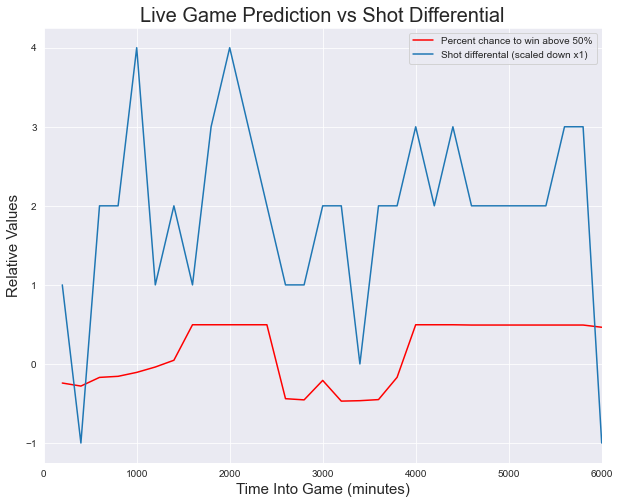

In [30]:
make_line_plot(minutes_model_art_2, 'probability_win', 'Shot')

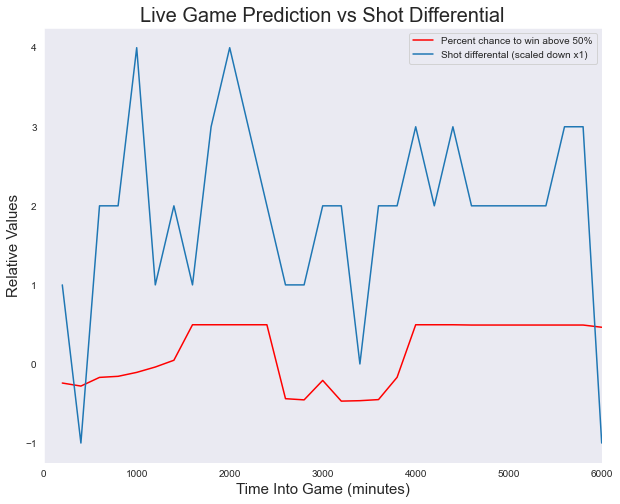

In [60]:
make_line_plot(minutes_model_art_2, 'probability_win', 'Shot')

In [54]:
minutes_model_art_2

,Goal,Shot,Blocked Shot,Faceoff,Takeaway,Giveaway,Hit,Missed Shot,Penalty,predictions,probability_win,period_time
0,0,1,0,0,0,0,-1,0,0,no,0.258870,200
1,0,-1,-1,-2,0,1,-1,-2,0,no,0.220365,400
2,0,2,-2,-2,2,1,0,-1,0,no,0.330102,600
3,0,2,-2,-2,2,1,-1,-1,0,no,0.343738,800
4,0,4,-3,-2,2,1,-1,2,0,no,0.393556,1000
5,0,1,-3,-2,2,1,2,1,-1,no,0.461407,1200
6,0,2,-3,-2,1,2,2,2,-1,yes,0.546882,1400
7,1,1,-2,-2,0,2,0,0,-1,yes,0.995833,1600
8,1,3,-2,-2,0,2,0,-1,-2,yes,0.995833,1800
9,1,4,-2,-1,-1,2,-3,0,-2,yes,0.995833,2000
